In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os,cv2,keras

In [3]:
# tf.debugging.set_log_device_placement(True)
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [23]:
X_new = np.load('/content/drive/MyDrive/R_CNN_SCRATCH/X_new.npy')
Y_new = np.load('/content/drive/MyDrive/R_CNN_SCRATCH/Y_new.npy')

In [26]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [59]:
model_final = tf.keras.models.load_model('/content/drive/MyDrive/R_CNN_SCRATCH/rcnn_vgg16_1_Final1_new1.h5')

1/1 [==============================] - 1s 627ms/step
not plane


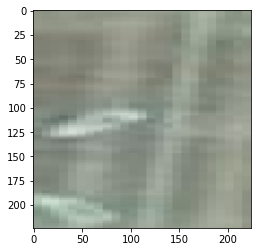

In [62]:
# for i in X_test:
imtest = X_new[3446]
# imtest.shape
plt.imshow(imtest)
# img = np.expand_dims(im,axis=0) # expand_dims flattens out the image along row
resized = cv2.resize(imtest, (224,224), interpolation = cv2.INTER_AREA)
img = np.expand_dims(resized, axis=0)
out = model_final.predict(img)
if out[0][0] > out[0][1]:
#   print(e,"plane")
    print('plane')
else:
#   print(e,"not plane")
    print('not plane')

In [63]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

2223
1/1 [==============================] - 1s 899ms/step
[[3.0591600e-05 9.9996936e-01]]
1/1 [==============================] - 1s 566ms/step
[[0.00249025 0.9975097 ]]
1/1 [==============================] - 1s 530ms/step
[[2.9143837e-07 9.9999976e-01]]
1/1 [==============================] - 1s 529ms/step
[[4.4347205e-05 9.9995565e-01]]
1/1 [==============================] - 1s 651ms/step
[[1.8671239e-04 9.9981326e-01]]
1/1 [==============================] - 1s 996ms/step
[[0.0096411 0.9903589]]
1/1 [==============================] - 1s 1s/step
[[0.00393829 0.99606174]]
1/1 [==============================] - 1s 970ms/step
[[2.3120154e-05 9.9997687e-01]]
1/1 [==============================] - 1s 949ms/step
[[8.025416e-06 9.999920e-01]]
1/1 [==============================] - 1s 581ms/step
[[7.2201137e-06 9.9999273e-01]]
1/1 [==============================] - 1s 530ms/step
[[0.17180495 0.82819504]]
1/1 [==============================] - 1s 545ms/step
[[9.0928552e-05 9.9990904e-01]]
1/1 [=

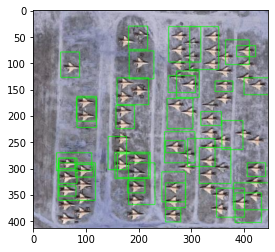

In [65]:
z=0
flag=0
img = cv2.imread('/content/drive/MyDrive/R_CNN_SCRATCH/Images/Planes10.jpg')
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
print(len(ssresults))
for e,result in enumerate(ssresults):
  # if e < 200:
    x,y,w,h = result
    timage = imout[y:y+h,x:x+w]
    # timage = imout[x:x+w,y:y+h]
    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
    img = np.expand_dims(resized, axis=0)
    out= model_final.predict(img)
    print(out)
    if out[0][0] > 0.9:
      cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)
# break
# break
# if(flag):
#   break